# World Population (EDA)

## Steps to EDA

1. importing libraries

2. Loading Data (pd.read_csv("file.csv"))

3. data understanding/knowing

    3.1. df.shape

    3.2. df.head(10), df.tail(), df.sample()

    3.3. df.info() --> dtype, null

    3.4. df.describe() --> statistical overview

    3.5. numeric/cat_col = df.select_dtype(exclude/include="number"/"object")

    3.6.feature relations : Correlation, Mutual information, statistical tests

4. Remove Duplicate

5. Null Handling

6. Skewness handling

7. Outlier Handling

8. Filter data for advanced analysis

9. Scale the numeric data

10. Encode categorical data

11. Feature engineering

    11.1. Dimentionality reduction (e.g PCA, tSNE, UMAP)

    11.2. Manual featuring

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/AlexTheAnalyst/PandasYouTubeSeries/main/world_population.csv")

In [ ]:
df.shape

(234, 17)

In [ ]:
#check the first 5 rows of data
#based on how you do that or how patience you are in this step could be insightful

df.head(10)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00
5,42,AGO,Angola,Luanda,Africa,35588987.0,33428485.0,28127721.0,23364185.0,16394062.0,11828638.0,8330047.0,6029700.0,1246700.0,28.5466,1.0315,0.45
6,224,AIA,Anguilla,The Valley,North America,15857.0,15585.0,14525.0,13172.0,11047.0,8316.0,6560.0,6283.0,91.0,174.2527,1.0066,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763.0,92664.0,89941.0,85695.0,75055.0,63328.0,64888.0,64516.0,442.0,212.1335,1.0058,0.00
8,33,ARG,Argentina,Buenos Aires,South America,45510318.0,45036032.0,43257065.0,41100123.0,37070774.0,32637657.0,28024803.0,23842803.0,2780400.0,16.3683,1.0052,0.57
9,140,ARM,Armenia,Yerevan,Asia,2780469.0,2805608.0,2878595.0,2946293.0,3168523.0,3556539.0,3135123.0,2534377.0,29743.0,93.4831,0.9962,0.03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [ ]:
df.describe().T #transpose
# df.describe(include="all").T ---> #df.describe() automatically excclude non-numerical features

,count,mean,std,min,25%,50%,75%,max
Rank,234.0,1.175000e+02,6.769417e+01,1.0000,59.250000,1.175000e+02,1.757500e+02,2.340000e+02
2022 Population,230.0,3.463225e+07,1.378892e+08,510.0000,419738.500000,5.762857e+06,2.265372e+07,1.425887e+09
2020 Population,233.0,3.360071e+07,1.358732e+08,520.0000,406471.000000,5.456681e+06,2.152263e+07,1.424930e+09
2015 Population,230.0,3.206600e+07,1.315071e+08,564.0000,394295.000000,5.244415e+06,1.973085e+07,1.393715e+09
2010 Population,227.0,3.027016e+07,1.260742e+08,596.0000,382726.500000,4.889741e+06,1.682585e+07,1.348191e+09
2000 Population,227.0,2.684050e+07,1.133525e+08,651.0000,329470.000000,4.491202e+06,1.562547e+07,1.264099e+09
1990 Population,229.0,1.933046e+07,8.130962e+07,700.0000,261928.000000,3.785847e+06,1.188276e+07,1.153704e+09
1980 Population,229.0,1.628288e+07,6.934547e+07,733.0000,223752.000000,3.135123e+06,9.817257e+06,9.823725e+08
1970 Population,230.0,1.586650e+07,6.835586e+07,752.0000,145880.500000,2.511718e+06,8.817329e+06,8.225344e+08
Area (km²),232.0,5.816637e+05,1.769133e+06,1.0000,2567.250000,7.714100e+04,4.146432e+05,1.709824e+07


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
CCA3,234,234,AFG,1
Country,234,234,Afghanistan,1
Capital,234,234,Kabul,1
Continent,234,6,Africa,57


In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rank,234.0,NaN,NaN,NaN,117.5,67.694165,1.0,59.25,117.5,175.75,234.0
CCA3,234,234,AFG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,234,234,Afghanistan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Capital,234,234,Kabul,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Continent,234,6,Africa,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022 Population,230.0,NaN,NaN,NaN,34632250.878261,137889172.436962,510.0,419738.5,5762857.0,22653719.0,1425887337.0
2020 Population,233.0,NaN,NaN,NaN,33600710.95279,135873196.61116,520.0,406471.0,5456681.0,21522626.0,1424929781.0
2015 Population,230.0,NaN,NaN,NaN,32066004.156522,131507146.335386,564.0,394295.0,5244415.0,19730853.75,1393715448.0
2010 Population,227.0,NaN,NaN,NaN,30270164.475771,126074183.542821,596.0,382726.5,4889741.0,16825852.5,1348191368.0
2000 Population,227.0,NaN,NaN,NaN,26840495.255507,113352454.572145,651.0,329470.0,4491202.0,15625467.0,1264099069.0


In [ ]:
all_cols = df.columns

In [ ]:
numeric_cols = df.select_dtypes(include="number").columns
numeric_cols

Index(['Rank', '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [ ]:
cat_cols = df.select_dtypes(include = "object").columns
cat_cols

Index(['CCA3', 'Country', 'Capital', 'Continent'], dtype='object')

In [ ]:
df[numeric_cols].corr().T

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.000000,-0.357989,-0.356283,-0.352850,-0.350009,-0.342095,-0.333014,-0.328620,-0.335737,-0.384854,0.128994,-0.220197,-0.358464
2022 Population,-0.357989,1.000000,0.999946,0.999492,0.998633,0.994602,0.991124,0.986675,0.973135,0.452812,-0.028761,-0.022059,0.999999
2020 Population,-0.356283,0.999946,1.000000,0.999764,0.999108,0.995582,0.992557,0.988392,0.975245,0.454902,-0.027802,-0.025976,0.999944
2015 Population,-0.352850,0.999492,0.999764,1.000000,0.999784,0.997343,0.994968,0.991346,0.979413,0.458101,-0.027740,-0.031150,0.999489
2010 Population,-0.350009,0.998633,0.999108,0.999784,1.000000,0.998595,0.996716,0.993628,0.983050,0.461498,-0.026635,-0.038262,0.998630
2000 Population,-0.342095,0.994602,0.995582,0.997343,0.998595,1.000000,0.999192,0.997247,0.990959,0.473137,-0.026341,-0.052041,0.994598
1990 Population,-0.333014,0.991124,0.992557,0.994968,0.996716,0.999192,1.000000,0.999257,0.997158,0.524392,-0.032348,-0.066718,0.991102
1980 Population,-0.328620,0.986675,0.988392,0.991346,0.993628,0.997247,0.999257,1.000000,0.999251,0.530726,-0.032167,-0.077794,0.986652
1970 Population,-0.335737,0.973135,0.975245,0.979413,0.983050,0.990959,0.997158,0.999251,1.000000,0.509942,-0.027523,-0.080020,0.973143
Area (km²),-0.384854,0.452812,0.454902,0.458101,0.461498,0.473137,0.524392,0.530726,0.509942,1.000000,-0.063545,-0.012829,0.453305


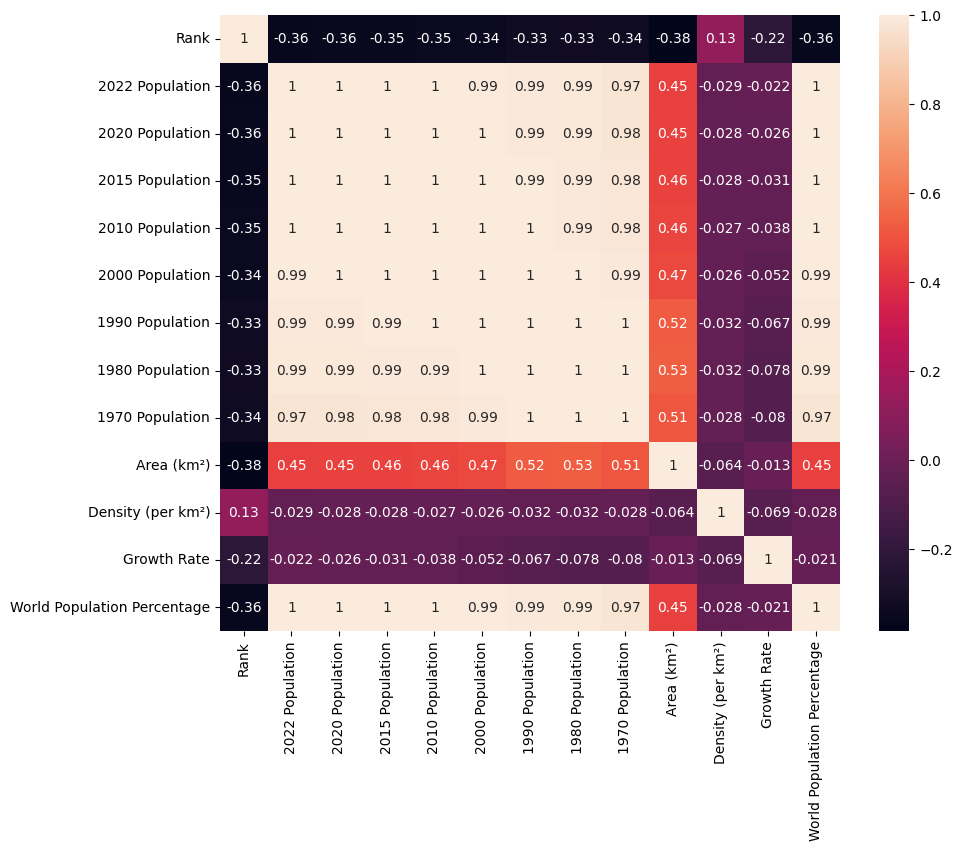

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr().T, annot=True)
plt.show()

In [ ]:
# check dublicae
df.duplicated().sum()

np.int64(0)

In [ ]:
#remove duplicate
# df.drop_duplicates(inplace=True)

In [ ]:
#check nulls

# null --> nothing / missing / refer to nowhere
# NaN --> Not a number

df.isnull().sum()
# df.isna().sum

,0
Rank,0
CCA3,0
Country,0
Capital,0
Continent,0
2022 Population,4
2020 Population,1
2015 Population,4
2010 Population,7
2000 Population,7


In [ ]:
# nulls in whole dataframe
df.isnull().sum().sum()

np.int64(45)

In [ ]:
# null managing

#Removal
df.dropna() #rows
df.dropna(axis=1) #columns --> not recommended

,Rank,CCA3,Country,Capital,Continent,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,0.52
1,138,ALB,Albania,Tirana,Europe,0.04
2,34,DZA,Algeria,Algiers,Africa,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,0.00
...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,0.01
231,46,YEM,Yemen,Sanaa,Asia,0.42
232,63,ZMB,Zambia,Lusaka,Africa,0.25


In [ ]:
# impute null values

# numerical :
# mean (highly affected by outliers)--> df.fillna(df["col"].mean)
# median (better option) --> df.fillna(df["col"].median)

# categorigcal --> mode

# fill with a constant:
df.fillna(0)
df5 = df[numeric_cols].fillna(df[numeric_cols].median)
df6 = df[cat_cols].fillna(df[cat_cols].mode())

In [ ]:
from pandas.core.arrays import numeric

# better option for numeric cols -----"K nearest neighbors" (KNN imputer)
from sklearn.impute import KNNImputer
KNN_imputer = KNNImputer(n_neighbors=5)
df7 = KNN_imputer.fit_transform(df[numeric_cols]) # KNN generates numpy series so we need to convert it to dataframe
pd.DataFrame(df7, columns=numeric_cols)

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36.0,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138.0,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34.0,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213.0,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203.0,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226.0,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.4930,0.9953,0.00
230,172.0,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.1654,1.0184,0.01
231,46.0,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42
232,63.0,20017675.0,18927715.0,15040082.0,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.5976,1.0280,0.25


In [ ]:
df8 = pd.concat((df[cat_cols], pd.DataFrame(df7)), axis=1) # instead of df7 we use pd.DataFrame(df7)
df8.isnull()

,CCA3,Country,Capital,Continent,0,1,2,3,4,5,6,7,8,9,10,11,12
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
230,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
231,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


/tmp/ipython-input-1615239152.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numeric_cols])


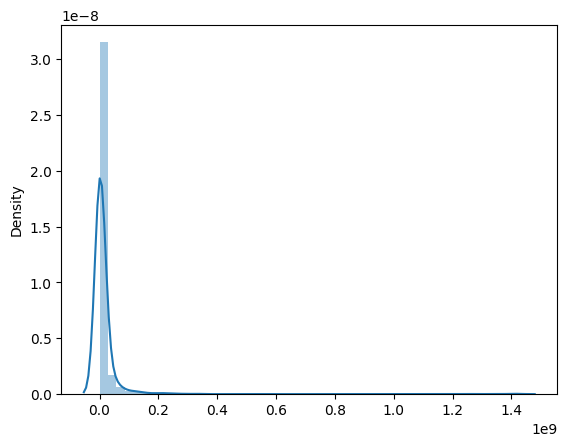

In [ ]:
# Skewness analysis
sns.distplot(df[numeric_cols])
plt.show()

In [ ]:
df['1970 Population'].skew()

np.float64(9.573277154630262)

In [ ]:
df.sort_values(by='1970 Population', ascending=False).head(10)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,982372466.0,822534450.0,9706961.0,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1.417173e+09,1.396387e+09,1.322867e+09,1.240614e+09,1.059634e+09,NaN,NaN,557501301.0,3287590.0,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,3.382899e+08,3.359420e+08,3.246078e+08,3.111828e+08,2.823986e+08,2.480837e+08,223140018.0,200328340.0,9372610.0,36.0935,1.0038,4.24
171,9,RUS,Russia,Moscow,Europe,1.447133e+08,1.456173e+08,1.446684e+08,1.432426e+08,1.468448e+08,1.480057e+08,138257420.0,130093010.0,17098242.0,8.4636,0.9973,1.81
93,4,IDN,Indonesia,Jakarta,Asia,2.755013e+08,2.718580e+08,2.590920e+08,2.440162e+08,2.140724e+08,1.821599e+08,148177096.0,115228394.0,1904569.0,144.6529,1.0064,3.45
102,11,JPN,Japan,Tokyo,Asia,1.239517e+08,1.252448e+08,1.272509e+08,1.281054e+08,1.268039e+08,1.236863e+08,117624196.0,105416839.0,377930.0,327.9753,0.9947,1.55
27,7,BRA,Brazil,Brasilia,South America,2.153135e+08,2.131963e+08,2.051882e+08,1.963535e+08,1.758737e+08,1.507064e+08,122288383.0,96369875.0,8515767.0,25.2841,1.0046,2.70
74,19,DEU,Germany,Berlin,Europe,8.336984e+07,8.332899e+07,8.207323e+07,8.132509e+07,8.155168e+07,7.937020e+07,77786703.0,78294583.0,357114.0,233.4544,0.9995,1.05
16,8,BGD,Bangladesh,Dhaka,Asia,1.711864e+08,1.674210e+08,1.578300e+08,1.483911e+08,1.291933e+08,1.071477e+08,83929765.0,67541860.0,147570.0,1160.0350,1.0108,2.15
156,5,PAK,Pakistan,Islamabad,Asia,2.358249e+08,2.271967e+08,2.109693e+08,1.944545e+08,1.543699e+08,1.154141e+08,80624057.0,59290872.0,881912.0,267.4018,1.0191,2.96
